In [1]:
import matplotlib.pyplot as plt
import itertools as it
import numpy as np
import random
from collections import Counter


In [2]:
msgs_raw = [
    "224111113212111111203114112411113111301211411111121112112220324215121121113032411114111112111120",
    "111211121122203242151211211130324111141111121111201224211411121221201111522412212111201215111141",
    "112012242114111212212011115224122121112012151111412221230122422412212111201134111141111121211101",
    "114122212301224224122121112011341111411111212111012151124111212230121513411122121201211112224121",
    "11012151124111212230121513411122121201211112224121112212031521141112211130113422421222112012242114",
    "12112111303151124121112212031521141112211112012151124112111123031511241221111130121142211112121121301211111111242111212110121142114122212303151115121121230324224212221120311411241123121203151342121111"
]

msgs = [
    "2241111132121111112031141124111131113012114111",
    "11121112112220324215121121113032411114111112111120",
    "1224211411121221201111522412212111201215111141",
    "2221230122422412212111201134111141111121211101",
    "2151124111212230121513411122121201211112224121",
    "112212031521141112211130113422421222112012242114",
    "12112111303151124121112212031521141112211112012151124112111123031511241221111130121142211112121121301211111111242111212110121142114122212303151115121121230324224212221120311411241123121203151342121111"
]

# msgs = [
#     msgs_raw[0],
#     msgs[-1][0:50] + msgs_raw[1][50:],
#     msgs[-1][50:100] + msgs_raw[2][50:],
#     msgs[-1][100:150] + msgs_raw[3][50:],
#     msgs[-1][150:200] + msgs_raw[4][50:],
# ]

msgs_raw_flat = "".join(msgs_raw)
msgs_flat = "".join(msgs)


In [3]:
print(sum([int(x) for x in msgs_raw_flat]))
print(sum([int(x) for x in msgs_flat]))
print(len(msgs_raw_flat))
print(len(msgs_flat))

1127
804
682
482


# Draw Raw

In [4]:
c_to_pix = {
    "0": np.array([
        [ 1, 1, 1 ],
        [ 1, 0, 1 ],
        [ 1, 1, 1 ] ]),

    "1": np.array([
        [ 0 ],
        [ 1 ],
        [ 0 ] ]),

    "2": np.array([
        [ 1 ],
        [ 0 ], 
        [ 1 ] ]),

    "3": np.array([
        [ 1 ],
        [ 1 ], 
        [ 1 ] ]),

    "4": np.array([
        [ 0, 1, 0 ],
        [ 1, 0, 1 ],
        [ 0, 1, 0 ] ]),

    "5": np.array([
        [ 0, 1, 0 ],
        [ 1, 1, 1 ],
        [ 0, 1, 0 ] ]),
}


In [5]:
for i, msg in enumerate(msgs_raw[:5]):
    im = np.zeros((5, 300), dtype=int)
    im_x = 0

    for c in msg:
        pix = c_to_pix[c]

        im_x += 1
        for y in range(len(pix)):
            for x in range(len(pix[y])):
                im[y + 1, im_x + x] = pix[y, x]

        im_x += len(pix[0])
    
    # Show image on its own without an axis or any padding
    plt.figure()
    plt.imshow(im, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Save image to raw_i.png
    plt.imsave(f"imgs/raw_{i}.png", im, cmap='gray')


# Run Sums

## Raw Messages

1	[8, 0, 5, 2, 4, 6, 3, 17, 12, 10, 13, 16, 7, 24, 9]
2	[0, 12, 1, 6, 11, 18, 3, 2, 4, 7, 9, 17, 5, 15, 22, 8, 14, 21]
3	[13, 18, 3, 30, 24, 0, 45, 196, 32, 42, 52, 10, 67, 47, 2, 27, 54, 56, 6, 7]
4	[4, 26, 18, 36, 10, 16, 19, 34, 17, 48, 9]
5	[101, 73, 77, 25, 47, 165, 48, 55, 85, 114, 3, 17]
0	[29, 30, 18, 22, 20, 23, 26]


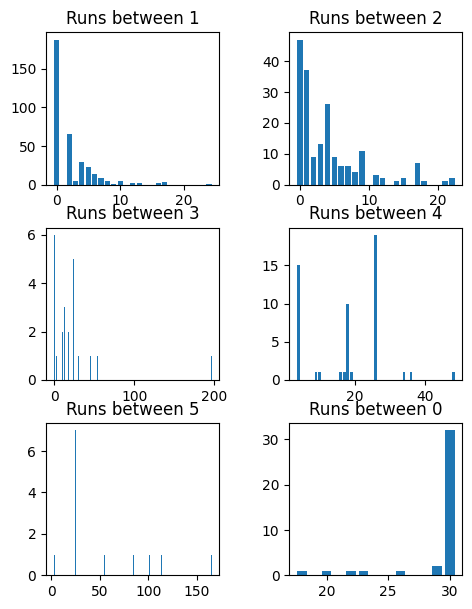

In [6]:
vals = [ 1, 2, 3, 4, 5, 0 ]
counters = []

for i in vals:
    runs = [ [ int(x) for x in run ] for run in msgs_raw_flat.split(str(i)) ]
    sums = [ sum(run) for run in runs ]
    counter = Counter(sums)
    print(f"{i}\t{list(counter.keys())}")
    counters.append(counter)

fig, axs = plt.subplots(3, 2, figsize=(5, 6))
fig.tight_layout(pad=1)
for i, ax in enumerate(axs.flat):
    counter = counters[i]
    ax.bar(counter.keys(), counter.values())
    ax.set_title(f"Runs between {vals[i]}")

plt.show()


## Merged Messages

1	[8, 0, 5, 2, 4, 6, 3, 17, 12, 10, 13, 16, 7, 24, 9]
2	[0, 12, 1, 6, 11, 18, 3, 2, 4, 7, 9, 17, 5, 15, 22, 8, 14, 21]
3	[13, 18, 3, 30, 24, 0, 114, 32, 52, 10, 47, 2, 27, 54, 56, 6, 7]
4	[4, 26, 18, 34, 17, 48, 9]
5	[101, 77, 25, 85, 55, 114, 3, 17]
0	[29, 30, 26]


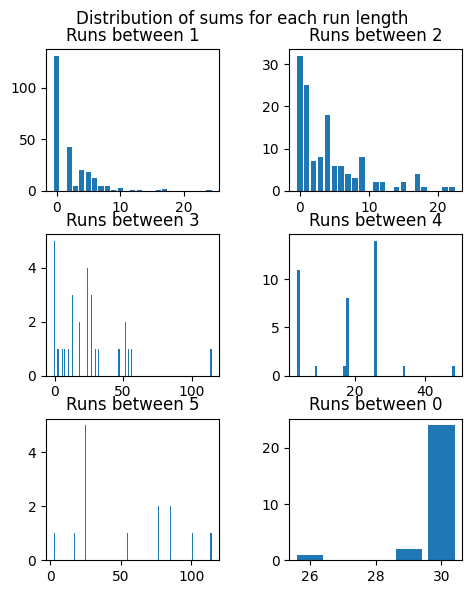

In [7]:
vals = [ 1, 2, 3, 4, 5, 0 ]
counters = []

for i in vals:
    runs = [ [ int(x) for x in run ] for run in msgs_flat.split(str(i)) ]
    sums = [ sum(run) for run in runs ]
    counter = Counter(sums)
    print(f"{i}\t{list(counter.keys())}")
    counters.append(counter)

fig, axs = plt.subplots(3, 2, figsize=(5, 6))
fig.suptitle('Distribution of sums for each run length')
fig.tight_layout(pad=1)
for i, ax in enumerate(axs.flat):
    counter = counters[i]
    ax.bar(counter.keys(), counter.values())
    ax.set_title(f"Runs between {vals[i]}")

plt.show()


In [8]:
vals = [ 1, 2, 3, 4, 5, 0 ]
counters = []

for i in vals:
    counters.append(Counter())

    for msg in msgs_raw:
        runs = [ [ int(x) for x in run ] for run in msg.split(str(i))[1:-1] ]
        sums = [ sum(run) for run in runs ]
        counter = Counter(sums)
        counters[-1] += counter

    print(f"{i}\t{list(counters[-1].keys())}")


1	[0, 5, 2, 4, 6, 3, 17, 12, 10, 13, 16, 7, 8, 24, 9]
2	[0, 12, 1, 6, 11, 18, 3, 2, 4, 7, 9, 17, 5, 15, 22, 8, 14, 21]
3	[13, 18, 3, 30, 24, 0, 32, 52, 10, 47, 2, 27, 54, 56, 6, 7]
4	[26, 4, 18, 34, 17, 48]
5	[77, 25, 55, 114, 3]
0	[30, 29]


# Split Runs

In [10]:
msgs_sr = "".join(msgs).split("0")
msgs_sr_lengths = [ sum([ int(x) for x in msg ]) for msg in msgs_sr ]

print(f"{len(msgs_sr)} messages")
print(f"lengths={msgs_sr_lengths}\n")
for msg_len, msg in zip(msgs_sr_lengths, msgs_sr):
    print(msg + "0")
    # print(f"{msg_len}\t {msg}")


27 messages
lengths=[29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 26]

22411111321211111120
311411241111311130
1211411111121112112220
3242151211211130
32411114111112111120
122421141112122120
111152241221211120
12151111412221230
12242241221211120
113411114111112121110
12151124111212230
12151341112212120
12111122241211122120
31521141112211130
1134224212221120
122421141211211130
31511241211122120
315211411122111120
121511241121111230
31511241221111130
12114221111212112130
1211111111242111212110
12114211412221230
3151115121121230
324224212221120
31141124112312120
31513421211110


# Split Runs (4)

In [10]:
msgs_s4 = "".join(msgs).split("4")
msgs_s4_lengths = [ sum([ int(x) for x in msg ]) for msg in msgs_s4 ]

print(f"{len(msgs_s4)} messages")
print(f"lengths={msgs_s4_lengths}\n")
for msg_len, msg in zip(msgs_s4_lengths, msgs_s4):
    print(f"{msg_len}\t {msg}")


37 messages
lengths=[4, 26, 4, 18, 26, 26, 4, 18, 4, 26, 26, 18, 4, 18, 4, 26, 26, 26, 26, 18, 4, 18, 4, 26, 26, 26, 26, 18, 34, 17, 4, 48, 4, 18, 4, 26, 9]

4	 22
26	 11111321211111120311
4	 112
18	 11113111301211
26	 1111112111211222032
26	 215121121113032
4	 1111
18	 111112111120122
4	 211
26	 11121221201111522
26	 122121112012151111
18	 12221230122
4	 22
18	 1221211120113
4	 1111
26	 1111121211101215112
26	 111212230121513
26	 1112212120121111222
26	 1211122120315211
18	 1112211130113
4	 22
18	 212221120122
4	 211
26	 1211211130315112
26	 1211122120315211
26	 111221111201215112
26	 1121111230315112
18	 12211111301211
34	 22111121211213012111111112
17	 21112121101211
4	 211
48	 12221230315111512112123032
4	 22
18	 212221120311
4	 112
26	 11231212031513
9	 2121111


# Auto RLE using 0 split runs

In [11]:
def msgs_to_im(msgs, fill=0):
    ml = max([len(msg) for msg in msgs])
    im = np.zeros((len(msgs), ml), dtype=np.uint8)
    for i, msg in enumerate(msgs):
        for j, x in enumerate(msg):
            im[i, j] = int(x)
        for j in range(len(msg), ml):
            im[i, j] = fill
    return im


In [12]:
def auto_rl_encode(msg, mapping=None):
    if mapping is None:
        mapping = { "0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5 }
    return "".join([ c * mapping[c] for c in msg ])


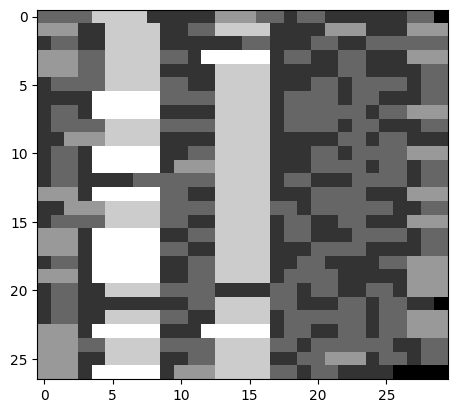

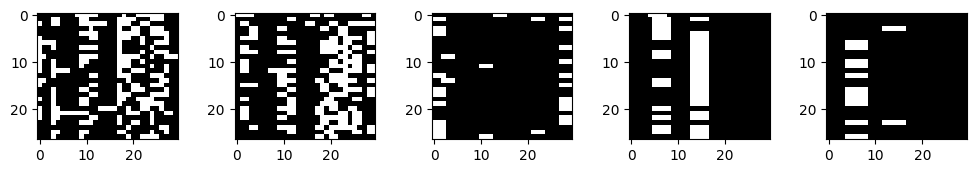

In [13]:
msgs_sr_srle = [ auto_rl_encode(msg) for msg in msgs_sr ]
im_sr_srle = np.array(msgs_to_im(msgs_sr_srle, fill=0))
plt.imshow(im_sr_srle, cmap="gray")
plt.show()

# Using subplots show plots for each value filtered
fig, axs = plt.subplots(1, 5, figsize=(10, 3))
fig.tight_layout(pad=1)
for i, ax in enumerate(axs.flat):
    ax.imshow(np.where(im_sr_srle == i + 1, 1, 0), cmap="gray")


In [14]:
all = []

for p in it.permutations(range(1, 6)):
    mapping = {}
    for i, x in enumerate(p):
        mapping[str(i+1)] = str(x)
    
    msg = msgs_flat.translate(str.maketrans(mapping))
    msg_split = msg.split("0")
    msg_sums = [ sum([ int(x) for x in m ]) for m in msg_split ]
    unique = len(set(msg_sums))

    all.append((unique, mapping))

all.sort(key=lambda x: x[0])

for i in range(5):
    print(all[i])

(3, {'1': '1', '2': '2', '3': '3', '4': '4', '5': '5'})
(5, {'1': '1', '2': '2', '3': '3', '4': '5', '5': '4'})
(6, {'1': '1', '2': '2', '3': '4', '4': '3', '5': '5'})
(6, {'1': '1', '2': '2', '3': '5', '4': '3', '5': '4'})
(7, {'1': '1', '2': '2', '3': '5', '4': '4', '5': '3'})


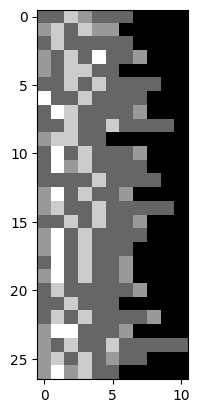

In [26]:
mapping = {'1': 0, '2': 1, '3': 1, '4': 1, '5': 1}
tmp = [ auto_rl_encode(msg, mapping) for msg in msgs_sr ]
plt.imshow(msgs_to_im(tmp, fill=0), cmap="gray")
plt.show()


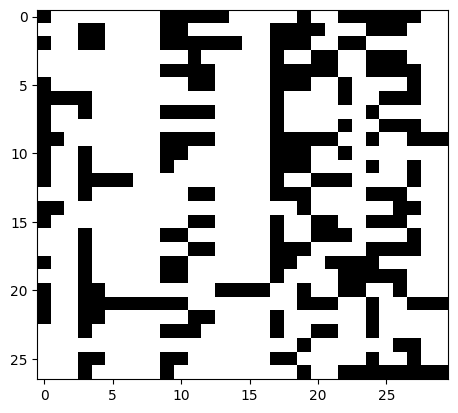

In [32]:
def unique_rl_encode(msg, mapping=None):
    return "".join([ int(c) * ("0" if c == "1" else "1") for c in msg ])

tmp = msgs_sr.copy()
tmp[0] = "1" + tmp[0]
msgs_sr_urle = [ unique_rl_encode(msg) for msg in tmp ]
im_sr_urle = np.array(msgs_to_im(msgs_sr_urle, fill=0))
plt.imshow(im_sr_urle, cmap="gray")
plt.show()


# RLE using 0-split runs

In [16]:
flip = 0

def rl_decode(msg, reset=True, initial=0):
    global flip
    if reset:
        flip = initial
    out = ""
    for c in msg:
        out += int(c) * str(flip)
        flip = 1 - flip
    return out


RL decode on SO6, initial = 0, reset = True


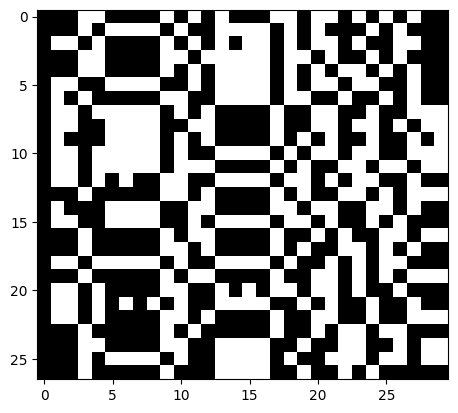

RL decode on SO6, initial = 0, reset = False


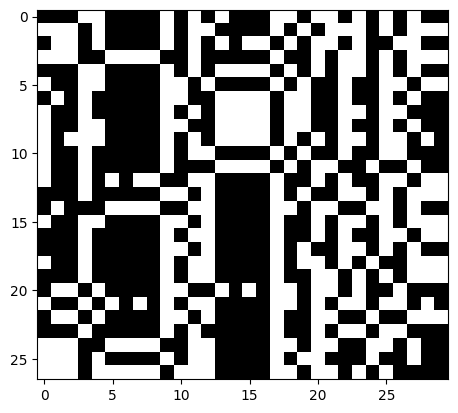

RL decode on SO6, initial = 1, reset = True


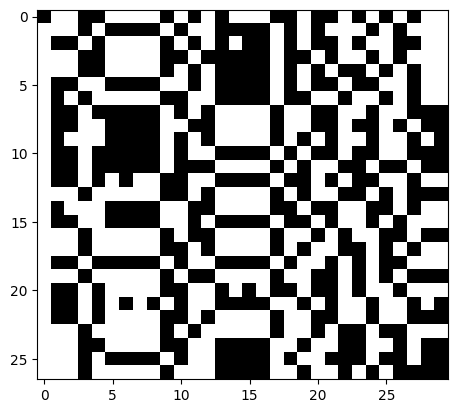

RL decode on SO6, initial = 1, reset = False


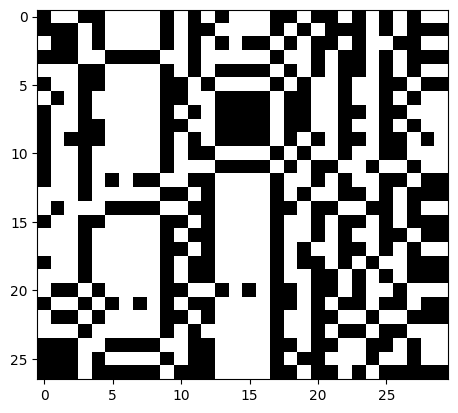

In [17]:
print("RL decode on SO6, initial = 0, reset = True")

flip = 0
msgs_sr_rle = [ rl_decode(msg, reset=True, initial=0) for msg in msgs_sr ]
im_sr_rle = msgs_to_im(msgs_sr_rle, fill=0)
im_sr_rle[0] = np.roll(im_sr_rle[0], 1)
plt.imshow(im_sr_rle, cmap="gray")
plt.show()

print("RL decode on SO6, initial = 0, reset = False")

flip = 0
msgs_sr_rle2 = [ rl_decode(msg, reset=False, initial=0) for msg in msgs_sr ]
im_sr_rle2 = msgs_to_im(msgs_sr_rle2, fill=0)
im_sr_rle2[0] = np.roll(im_sr_rle2[0], 1)
plt.imshow(im_sr_rle2, cmap="gray")
plt.show()

print("RL decode on SO6, initial = 1, reset = True")

flip = 1
msgs_sr_rle = [ rl_decode(msg, reset=True, initial=1) for msg in msgs_sr ]
im_sr_rle = msgs_to_im(msgs_sr_rle, fill=0)
im_sr_rle[0] = np.roll(im_sr_rle[0], 1)
plt.imshow(im_sr_rle, cmap="gray")
plt.show()

print("RL decode on SO6, initial = 1, reset = False")

flip = 1
msgs_sr_rle2 = [ rl_decode(msg, reset=False, initial=1) for msg in msgs_sr ]
im_sr_rle2 = msgs_to_im(msgs_sr_rle2, fill=0)
im_sr_rle2[0] = np.roll(im_sr_rle2[0], 1)
plt.imshow(im_sr_rle2, cmap="gray")
plt.show()


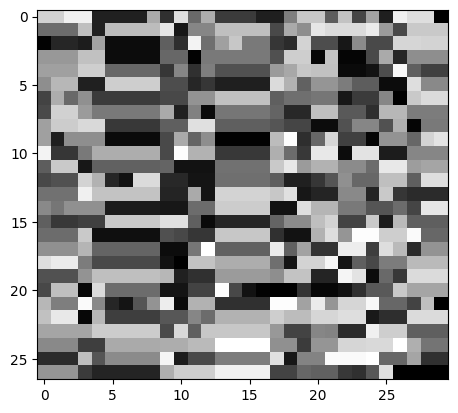

In [18]:

im_sr_rle3 = np.zeros((len(msgs_sr), 30), dtype=np.uint8)
for i, msg in enumerate(msgs_sr):
    j = 0
    for x in msg:
        col = random.uniform(0, 100)
        for o in range(int(x)):
            im_sr_rle3[i, j] = col
            j += 1
    while j < 30:
        im_sr_rle3[i, j] = 0
        j += 1

plt.imshow(im_sr_rle3, cmap="gray")


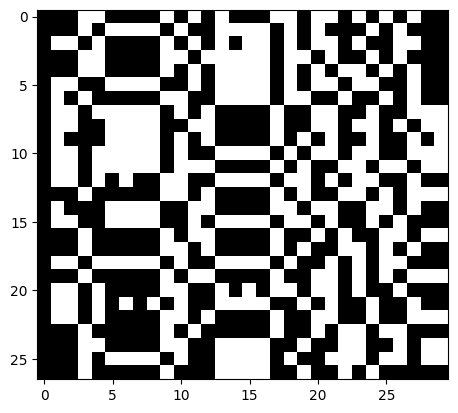

In [19]:
# Different run lengths

msgs_sr_rle = [ rl_decode(msg) for msg in msgs_sr ]
im_sr_rle = msgs_to_im(msgs_sr_rle, fill=0)
im_sr_rle[0] = np.roll(im_sr_rle[0], 1)
plt.imshow(im_sr_rle, cmap="gray")
plt.show()


# Auto RLE then wrap 30

804


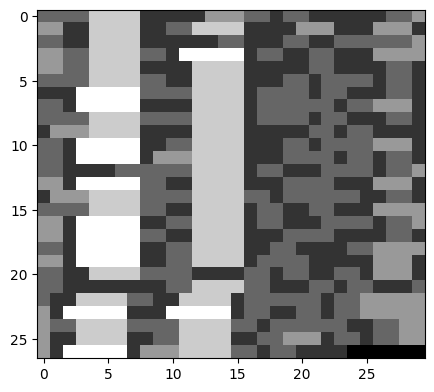

In [20]:
msgs_flat_srle = auto_rl_encode(msgs_flat)

print(len(msgs_flat_srle))

wrap = 30
# im_fsrle_wrap36_0 = "0" * (wrap - (len(msgs_flat_srle) % wrap)) + msgs_flat_srle
# im_fsrle_wrap36_0 = "0" + msgs_flat_srle
im_fsrle_wrap36_0 = msgs_flat_srle
im_fsrle_wrap36_1 = [ im_fsrle_wrap36_0[i:i+wrap] for i in range(0, len(im_fsrle_wrap36_0), wrap) ]
im_fsrle_wrap36 = msgs_to_im(im_fsrle_wrap36_1, fill=0)

plt.figure(figsize=(5,5))
plt.imshow(im_fsrle_wrap36, cmap="gray")
plt.show()


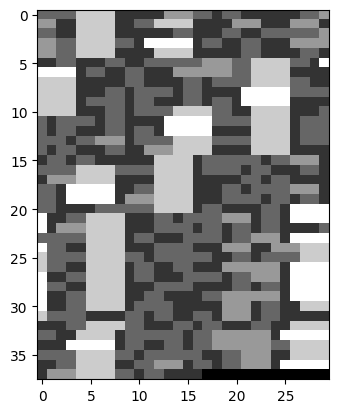

In [21]:
msgs_raw_flat_srle = auto_rl_encode(msgs_raw_flat)

wrap = 30
# im_raw_fsrle_wrap36_0 = "0" + msgs_raw_flat_srle
im_raw_fsrle_wrap36_0 = msgs_raw_flat_srle
im_raw_fsrle_wrap36_1 = [ im_raw_fsrle_wrap36_0[i:i+wrap] for i in range(0, len(im_raw_fsrle_wrap36_0), wrap) ]
im_raw_fsrle_wrap36 = msgs_to_im(im_raw_fsrle_wrap36_1, fill=0)

plt.imshow(im_raw_fsrle_wrap36, cmap="gray")
plt.show()


# RLE then wrap 36

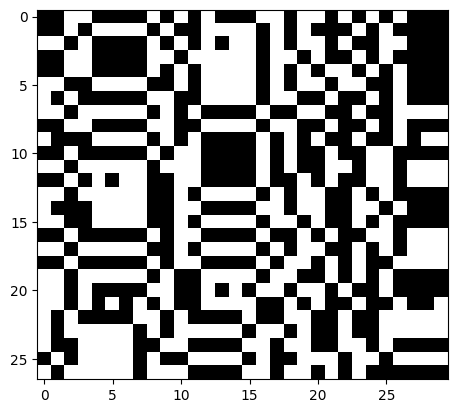

In [22]:
msgs_flat_rle = rl_decode(msgs_flat)

wrap = 30
im_frle_wrap36_0 = "0" + msgs_flat_rle
im_frle_wrap36_0 = msgs_flat_rle
im_frle_wrap36_1 = [ im_frle_wrap36_0[i:i+wrap] for i in range(0, len(im_frle_wrap36_0), wrap) ]
im_frle_wrap36 = msgs_to_im(im_frle_wrap36_1, fill=0)

plt.imshow(im_frle_wrap36, cmap="gray")
plt.show()


# Funky N using 0-split runs

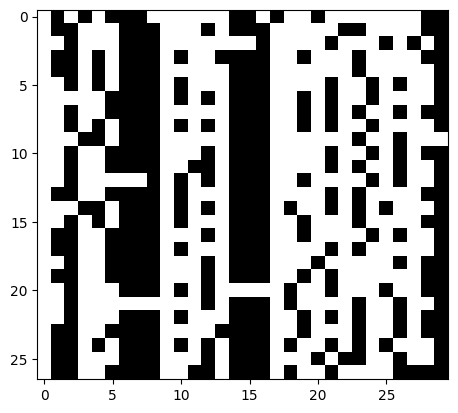

In [23]:
def funkyN(msg):
    return "".join([ ("1" + ("0" * (int(c) - 1))) for c in msg ])

msgs_sr_fn = [ funkyN(msg) for msg in msgs_sr ]

im_sr_fn = msgs_to_im(msgs_sr_fn, fill=0)
plt.imshow(im_sr_fn, cmap="gray")
plt.show()


# Funky N then wrap 18

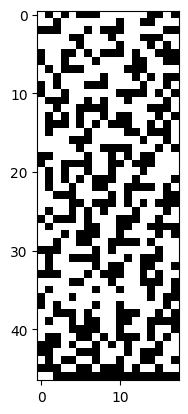

In [24]:
msgs_flat_fn = funkyN(msgs_flat)

wrap = 18
# im_flat_fn_wrap18_0 = "0" * (wrap - (len(msgs_flat_fn) % wrap)) + msgs_flat_fn
im_flat_fn_wrap18_0 = msgs_flat_fn
im_flat_fn_wrap18_1 = [ im_flat_fn_wrap18_0[i:i+wrap] for i in range(0, len(im_flat_fn_wrap18_0), wrap) ]
im_flat_fn_wrap18 = msgs_to_im(im_flat_fn_wrap18_1, fill=0)

plt.imshow(im_flat_fn_wrap18, cmap="gray")
plt.show()
